In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

In [3]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.shape

(150, 6)

<Axes: xlabel='count', ylabel='Species'>

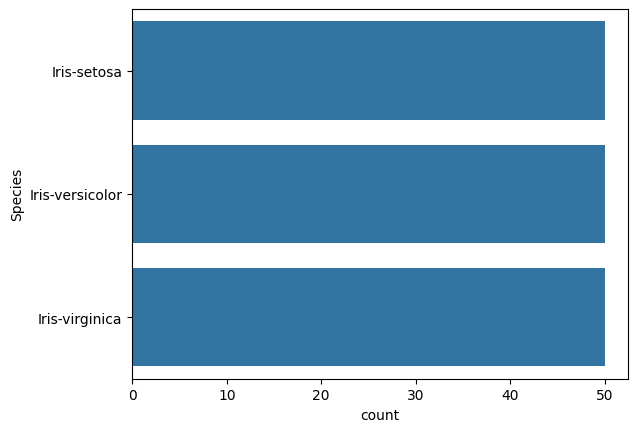

In [4]:
sns.countplot(data['Species'])

In [9]:
#Train Test Split
y = data.pop('Species')
x = data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Accuracy: 1.0
Classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



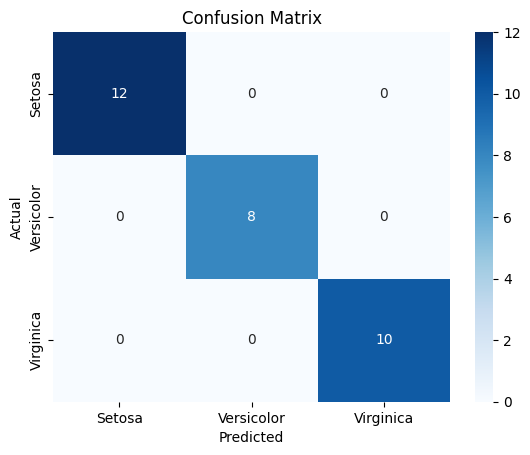

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt = 'd', cmap = "Blues", annot = True, xticklabels = ['Setosa', 'Versicolor', 'Virginica'], yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

[Text(0.6, 0.8333333333333334, 'Id <= 100.5\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]\nclass = Versicolor'),
 Text(0.4, 0.5, 'PetalLengthCm <= 2.45\ngini = 0.499\nsamples = 80\nvalue = [38, 42, 0]\nclass = Versicolor'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = Setosa'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]\nclass = Versicolor'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = Virginica'),
 Text(0.7, 0.6666666666666667, '  False')]

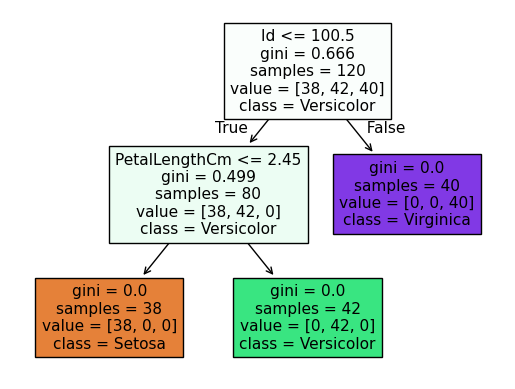

In [16]:
plot_tree(model, filled=True, feature_names = x.columns, class_names = ['Setosa', 'Versicolor', 'Virginica'])